In [27]:
%matplotlib inline

# Memoria Práctica 1

Autores: Román García y Patricia Losana

In [15]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
from Roc import *
import numpy as np
from sklearn import preprocessing 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pprint
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import accuracy_score

## 1. Particionado

Las tres estrategias de particionado implementadas parten de la misma idea principal: dado el conjunto de datos dataset, se genera un array con tantos elementos como filas tenga el conjunto (es decir, los índices). Este array se va a permutar para evitar que las particiones sean generadas sin ningún tipo de sesgo, y, en función de la estrategia, se devolverán unos u otros índices para entrenamiento y pruebas, respectivamente.

A continuación vamos a ver una descripción de los índices de train y test devueltos por cada uno de los métodos de particionado, y las principales ventajas y desventajas de los mismos

### 1.1 Validación Simple

Validación simple contiene un array de Particiones, con tantos elementos como valor tenga el atributo numeroParticiones. El valor 'porcentaje' especifica el porcentaje del array que va a formar parte de los índices de train, de forma que el resto de elementos formarán parte de los índices de test.

Para facilitar la comprensión, se ha acompañado la explicación de una figura. 

![title](img/Simple.png)

Ventajas: es rápido y aleatorio

Inconvenientes: los índices no se dividen de manera controlada. Aunque es improbable, puede darse el caso de que para las numeroParticiones veces que se repita la generación de particiones, los índices de Train y Test estén formados siempre por el mismo subconjunto de datos. 

### 1.2 Validación Cruzada

Validación cruzada contiene un array de Particiones, con tantos elementos como valor tenga el atributo numeroParticiones. El valor 'numeroParticiones' especifica el número de Particiones que se van a hacer del mismo tamaño del array. De esta manera, después de permutar, se iterará numeroParticiones veces y el número de iteración especificará el conjunto de índices que formarán parte de Test.

Para facilitar la comprensión, se ha acompañado la explicación de una figura.

![title](img/Cruzada.png)

Ventaja frente a Validación Simple: es mucho más controlada en cuanto a que tenemos la certeza de que todos los datos van a formar parte de los índices de prueba y entrenamiento, por lo que no hay tanto peligro de sobreaprendizaje.

Un posible inconveniente es que sólo se permuta una vez y que los índices que formen parte del entrenamiento van a ser parecidos en todas las iteraciones (sólo cambiarán K elementos cada vez)

### 1.3 Validación por Bootstrap

La estrategia de particionamiento de bootstrap es similar a la de Validación simple, con la diferencia de que los índices de Train se extraen de manera aleatoria con reemplazamiento (por tanto, puede darse el caso de entrenar varias veces con el mismo dato).

Para lograr esto, se permuta el array de índices cada vez que se selecciona un elemento a incluir en la partición de entrenamiento (el proceso se repite numeroParticiones veces). Posteriormente, el resto de elementos que no se hayan seleccionado como índices de entrenamiento pasarán a formar parte de los índices de prueba.

Ventaja: es totalmente aleatoria

Inconveniente: está aún menos controlada que la validación Simple

## 2. Naive-Bayes

## 2.1 Resultados de ejecución de tic-tac-toe.data

In [ ]:
dataset = Datos("ConjuntosDatos/tic-tac-toe.data")

### Validación Simple

##### Sin la corrección de Laplace:

In [ ]:
estrategia = ValidacionSimple()
clas = ClasificadorNaiveBayes()
val = clas.validacion(estrategia,dataset,clas)
media_error1 = np.mean(val)
desv_error1 = np.std(val)

print("Promedio del error = ", media_error1, "\nDesviación típica = ", desv_error1)

##### Con la corrección de Laplace:

In [ ]:
estrategia = ValidacionSimple()
clas = ClasificadorNaiveBayes(laplace=True)
val = clas.validacion(estrategia,dataset,clas)
media_error2 = np.mean(val)
desv_error2 = np.std(val)

print("Promedio del error = ", media_error2, "\nDesviación típica = ", desv_error2)

### Validación Cruzada

##### Sin la corrección de Laplace:

In [ ]:
estrategia = ValidacionCruzada()
clas = ClasificadorNaiveBayes()
val = clas.validacion(estrategia,dataset,clas)
media_error3 = np.mean(val)
desv_error3 = np.std(val)

print("Promedio del error = ", media_error3, "\nDesviación típica = ", desv_error3)

##### Con la corrección de Laplace:

In [ ]:
estrategia = ValidacionCruzada()
clas = ClasificadorNaiveBayes(laplace=True)
val = clas.validacion(estrategia,dataset,clas)
media_error4 = np.mean(val)
desv_error4 = np.std(val)

print("Promedio del error = ", media_error4, "\nDesviación típica = ", desv_error4)

### Validación por Bootstrap

##### Sin la corrección de Laplace:

In [ ]:
estrategia = ValidacionBootstrap()
clas = ClasificadorNaiveBayes()
val = clas.validacion(estrategia,dataset,clas)
media_error5 = np.mean(val)
desv_error5 = np.std(val)

print("Promedio del error = ", media_error5, "\nDesviación típica = ", desv_error5)

##### Con la corrección de Laplace:

In [ ]:
estrategia = ValidacionBootstrap()
clas = ClasificadorNaiveBayes(laplace=True)
val = clas.validacion(estrategia,dataset,clas)
media_error6 = np.mean(val)
desv_error6 = np.std(val)

print("Promedio del error = ", media_error6, "\nDesviación típica = ", desv_error6)

## Resultados de ejecución de german.data

In [ ]:
dataset = Datos("ConjuntosDatos/german.data")

### Validación Simple

##### Sin la corrección de Laplace:

In [ ]:
estrategia = ValidacionSimple()
clas = ClasificadorNaiveBayes()
val = clas.validacion(estrategia,dataset,clas)
media_error = np.mean(val)
desv_error = np.std(val)

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

##### Con la corrección de Laplace:

In [ ]:
estrategia = ValidacionSimple()
clas = ClasificadorNaiveBayes(laplace=True)
val = clas.validacion(estrategia,dataset,clas)
media_error = np.mean(val)
desv_error = np.std(val)

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

### Validación Cruzada


##### Sin la corrección de Laplace:

In [ ]:
estrategia = ValidacionCruzada()
clas = ClasificadorNaiveBayes()
val = clas.validacion(estrategia,dataset,clas)
media_error = np.mean(val)
desv_error = np.std(val)

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

##### Con la corrección de Laplace:

In [ ]:
estrategia = ValidacionCruzada()
clas = ClasificadorNaiveBayes(laplace=True)
val = clas.validacion(estrategia,dataset,clas)
media_error = np.mean(val)
desv_error = np.std(val)

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

### Validación por Bootstrap

##### Sin la corrección de Laplace:

In [ ]:
estrategia = ValidacionBootstrap()
clas = ClasificadorNaiveBayes()
val = clas.validacion(estrategia,dataset,clas)
media_error = np.mean(val)
desv_error = np.std(val)

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

##### Con la corrección de Laplace:

In [ ]:
estrategia = ValidacionBootstrap()
clas = ClasificadorNaiveBayes(laplace=True)
val = clas.validacion(estrategia,dataset,clas)
media_error = np.mean(val)
desv_error = np.std(val)

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

### Análisis de los resultados

Como se puede observar, los errores promedios son relativamente bajos y no hay grandes cambios se aplique o no la corrección de Laplace.
Las desviaciones típicas de los promedios son bastante altas en la estrategia de validación cruzada y por bootstrap. Este hecho no es sorprendente en el caso del bootstrap, ya que por la forma de seleccionar los datos de entrenamiento, puede no haber no obtenido la información suficiente para predecir correctamente.

## 3. Scikit-Learn

## 3.1 Resultados de ejecución de tic-tac-toe.data

In [ ]:
dataset = Datos("ConjuntosDatos/tic-tac-toe.data")

### Validación Simple

##### Sin la corrección de Laplace:

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para no Laplace -> alpha = 0 (pero el valor 0 da un warning)
clf = MultinomialNB(alpha=1.0e-10)

#Validacion Simple
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.6, test_size = 0.4 )

#Entrena el clasificador a partir de xTrain e yTrain
classifier = clf.fit(xTrain, yTrain)
#Predice el resultado de xTest en base al entrenamiento
pred = classifier.predict(xTest)

# Calcula el error (1 - la precision de la clasificacion)
error = 1  - accuracy_score(pred, yTest)
print("Error =", error)

##### Con la corrección de Laplace:

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para Laplace -> alpha = 1
clf = MultinomialNB(alpha=1)

#Validacion Simple
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.6, test_size = 0.4 )

#Entrena el clasificador a partir de xTrain e yTrain
classifier = clf.fit(xTrain, yTrain)
#Predice el resultado de xTest en base al entrenamiento
pred = classifier.predict(xTest)

# Calcula el error (1 - la precision de la clasificacion)
error = 1  - accuracy_score(pred, yTest)
print("Error =", error)

### Validación Cruzada


##### Sin la corrección de Laplace:

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para no Laplace -> alpha = 0
clf = MultinomialNB(alpha=1.0e-10)

#Validacion Cruzada: obtenemos los resultados de las predicciones de cv iteraciones
pred_kfolds = cross_val_score(clf, X, Y, cv = 5)

#Obtenemos el error de la media de las predicciones
media_error = 1 - pred_kfolds.mean()

#Obtenemos la desviacion tipica de las predicciones
desv_error = pred_kfolds.std()

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

##### Con la corrección de Laplace:

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para Laplace -> alpha = 1
clf = MultinomialNB(alpha=1)

#Validacion Cruzada: obtenemos los resultados de las predicciones de cv iteraciones
pred_kfolds = cross_val_score(clf, X, Y, cv = 5)

#Obtenemos el error de la media de las predicciones
media_error = 1 - pred_kfolds.mean()

#Obtenemos la desviacion tipica de las predicciones
desv_error = pred_kfolds.std()

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

## 3.2 Resultados de ejecución de german.data

In [ ]:
dataset = Datos("ConjuntosDatos/german.data")

### Validación Simple

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Continuos = GaussianNB
clf = GaussianNB()

#Validacion Simple
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.6 , test_size = 0.4)

#Entrena el clasificador a partir de xTrain e yTrain
classifier = clf.fit(xTrain, yTrain)
#Predice el resultado de xTest en base al entrenamiento
pred = classifier.predict(xTest)

# Calcula el error (1 - la precision de la clasificacion)
error = 1  - accuracy_score(pred, yTest)
print("Error =", error)

### Validación Cruzada

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para no Laplace -> alpha = 0
clf = GaussianNB()

#Validacion Cruzada: obtenemos los resultados de las predicciones de cv iteraciones
pred_kfolds = cross_val_score(clf, X, Y, cv = 5)

#Obtenemos el error de la media de las predicciones
media_error = 1 - pred_kfolds.mean()

#Obtenemos la desviacion tipica de las predicciones
desv_error = pred_kfolds.std()

print("Promedio del error = ", media_error, "\nDesviación típica = ", desv_error)

### Análisis de los resultados

Como se puede observar, en generar el promedio de error en la librería sklearn es parecido, o incluso peor, que los promedios obtenidos por nuestro clasificador. 
Sin embargo, las desviaciones de la media son menores que nuestro clasificador, lo que quiere decir que los resultados de las ejecuciones son más homogéneos.

## 4. Evaluación de hipótesis mediante Análisis ROC 

## Validación Simple

Matriz de confusión y diagramas del clasificador en el espacio ROC 

{'TPR': {0: 0.54, 1: 0.567}, 'FPR': {0: 0.433, 1: 0.46}}


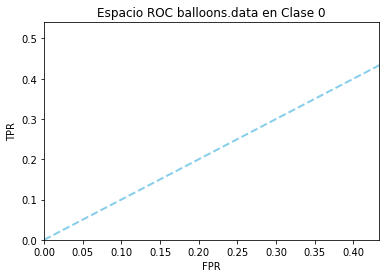

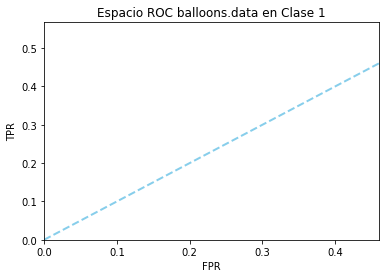

In [59]:
roc = Roc().roc
TPR = {}
FPR = {}
medias = []
ini = {}
for clas in roc[0][0]:
    ini.update({clas:0})

for archivo in roc:
    TPR = ini.copy()
    FPR = ini.copy()
    for particion in archivo:
        for clas in particion:
            TPR[clas] += particion[clas]["TPR"]
            FPR[clas] += particion[clas]["FPR"]
    for clas in TPR:
        TPR.update({clas:round(TPR[clas]/len(roc[0]),3)})
        FPR.update({clas:round(FPR[clas]/len(roc[0]),3)})
    medias.append({"TPR":TPR,"FPR":FPR})

balloons = medias[0]
german = medias[1]
tic_tac = medias[2]

print(balloons)

for i in balloons['TPR'].keys():
    plt.figure()
    lw = 2
    plt.plot([0, 1], [0, 1], color='skyblue', lw=lw, linestyle='--')
    plt.xlim([0.0, balloons['FPR'][i]])
    plt.ylim([0.0, balloons['TPR'][i]])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Espacio ROC balloons.data en Clase ' + str(i) )
    plt.show()


{'TPR': {0: 0.73, 1: 0.257}, 'FPR': {0: 0.743, 1: 0.27}}


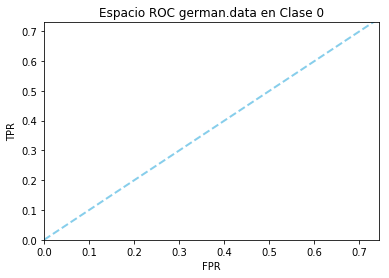

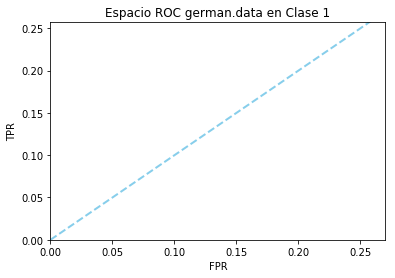

In [60]:
print(german)
for i in german['TPR'].keys():
    plt.figure()
    lw = 2
    plt.plot([0, 1], [0, 1], color='skyblue', lw=lw, linestyle='--')
    plt.xlim([0.0, german['FPR'][i]])
    plt.ylim([0.0, german['TPR'][i]])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Espacio ROC german.data en Clase ' + str(i) )
    plt.show()


{'TPR': {0: 0.5, 1: 1.0}, 'FPR': {0: 0.0, 1: 0.5}}


C:\Users\patri\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


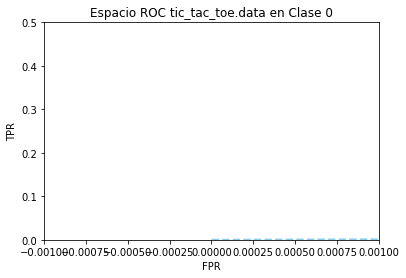

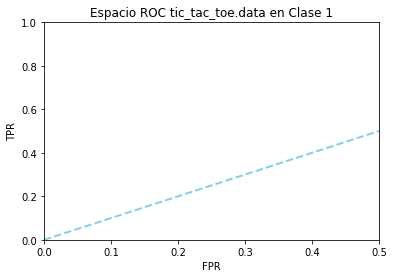

In [61]:
print(tic_tac)
for i in tic_tac['TPR'].keys():
    plt.figure()
    lw = 2
    plt.plot([0, 1], [0, 1], color='skyblue', lw=lw, linestyle='--')
    plt.xlim([0.0, tic_tac['FPR'][i]])
    plt.ylim([0.0, tic_tac['TPR'][i]])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Espacio ROC tic_tac_toe.data en Clase ' + str(i) )
    plt.show()


## Validación Cruzada